In [1]:
import numpy as np
import os
import nibabel
# from skimage import data
# import plotly
# import plotly.express as px

from runPngGenerator import *
import matplotlib.pyplot as plt

# Show image as video 

In [ ]:
def showImageCrossSection(fn):
    # Load the image
    nibImg = nibabel.load(fn)
    img = nibImg.get_fdata()
    
    for i in range(3):
        fig = px.imshow(img, color_continuous_scale='gray', 
                        contrast_rescaling='minmax',
                        animation_frame=i, binary_string=True)
        fig.update_layout(width=800, height=800)
        fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
        fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
        plotly.io.show(fig)
    
    print("Figures should be viewable now")


In [ ]:
fn = "/Users/youngjm/Data/slip/images/derivatives/mpr_fs_reconall_6.0.0/sub-HM910CW92X/ses-8177age04248/anat/sub-HM910CW92X_ses-8177age04248_acq-MprPrimary3p0UnknownContrastFromScanner35014_run-01_T1w/mri/aseg.mgz"

showImageCrossSection(fn)

# Testing alternate png generation 

In [2]:
inDir = "/mnt/isilon/bgdlab_processing/Data/SLIP/slip_vsmol/BIDS"
outBase = "~/Desktop/qc_testing"

demoPath = os.path.join(inDir, "participants.tsv")
demoDf = pd.read_csv(demoPath, sep="\t")

subIDs = [sub for sub in os.listdir(inDir) if "sub-" in sub]

for subID in subIDs:
    subPath = os.path.join(inDir, subID)
    
    sesIDs = [ses for ses in os.listdir(subPath) if "ses-" in ses]
    
    for sesID in sesIDs:
        sesPath = os.path.join(subPath, sesID)
        anatPath = os.path.join(sesPath, "anat")
        
        scans = [scan for scan in os.listdir(anatPath) if ".nii" in scan and "MPR" in scan]
        
        for scan in scans:
            scanID = scan.split(".nii")[0]
            scanPath = os.path.join(anatPath, scan)
            
            outDir = os.path.join(outBase, scanID)
#             if not os.path.exists(outDir):
#                 os.makedirs(outDir)
            

In [24]:
mprFn = scanPath
jsonPath = mprFn.replace(".nii", ".json").replace(".gz", "")
with open(jsonPath, 'r') as f:
    metadata = json.load(f)
    
if "ImageOrientation" in metadata:
    orientation = metadata['ImageOrientation']
    
nibImg = nibabel.load(scanPath)
# img = nibImg.get_fdata()

brainSlices, brainMids = selectBrainSlices(scanPath)

# Set up matplotlib
print(brainSlices)
print(brainMids)

[[51, 118, 192], [66, 139, 190], [48, 96, 123]]
[128, 127, 87]


(4.464835682883859, 32.81409864220768, -64.38039547310677)
(3.435166156850755, 32.8536491706036, 1.1974445570865555)
(2.715807994827628, 32.881280361674726, 47.01209992064628)


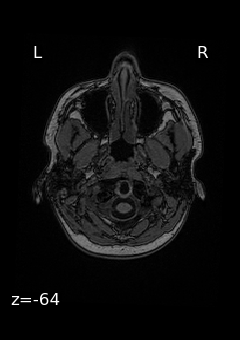

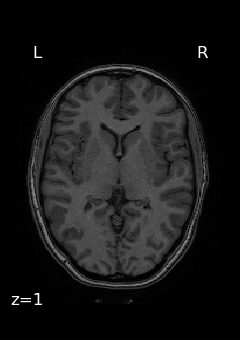

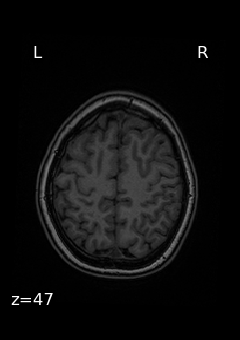

In [43]:
from nilearn import plotting
from nilearn.image import coord_transform

# niiimg = load_image(scanPath)
aff = nibImg.affine

# x = 
# z = 

# # y = dim0
# for y in brainSlices[0]:
#     tmp = coord_transform(y, 127, 87, aff)
#     newCut.append(tmp[1])
#     # Create the png file name here
#     plotting.plot_anat(nibImg, display_mode="y", cut_coords=[tmp[1]], draw_cross = False)


newCut = []
for z in brainSlices[1]:
    tmp = coord_transform(128, z, 87, aff)
    print(tmp)
    newCut.append(tmp[1])
    plotting.plot_anat(nibImg, display_mode="z", cut_coords=[tmp[2]], draw_cross = False)